# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

1.   Item da lista
2.   Item da lista



## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [10]:
import pandas as pd
from tabulate import tabulate

# Carrega o conjunto de dados em um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/DavidAugustoo/CP1-MachineLearning/main/carros.csv')

# Inspeção das primeiras 15 linhas
print("As primeiras 15 linhas do DataFrame:")
print(tabulate(df.head(15), headers='keys', tablefmt='psql'))

# Obtém a quantidade de dados e atributos do DataFrame
num_data = df.shape[0] # número de dados
num_features = df.shape[1] # número de atributos

# Verifica se existem valores faltantes no DataFrame
missing_values = df.isnull().sum() # quantidade de valores faltantes

# Obtém informações sobre os tipos de dados dos atributos
data_types = df.dtypes

info_dict = {
    "Número de dados": num_data,
    "Número de atributos": num_features,
    "Valores faltantes": missing_values.sum()
}

info_list = [[k, v] for k, v in info_dict.items()]
summary_list = [[col, missing_values[col], data_types[col]] for col in df.columns]

print("\nInformações gerais do conjunto de dados: \n")
print(tabulate(info_list, headers=["Descrição", "Valor"]))
print("\nValores faltantes e tipos de dados por atributo: \n")
print(tabulate(summary_list, headers=["Atributo", "Valores faltantes", "Tipos de dados"]))

# Remove dados nulos
df = df.dropna(axis = 0)

As primeiras 15 linhas do DataFrame:
+----+---------------+---------+-----------+----------------+-----------+---------------+----------------+--------+------------------+
|    | Brand         |   Price | Body      |   Mileage/1000 |   EngineV | Engine Type   | Registration   |   Year | Model            |
|----+---------------+---------+-----------+----------------+-----------+---------------+----------------+--------+------------------|
|  0 | BMW           |    4200 | sedan     |            277 |      2    | Petrol        | yes            |   1991 | 320              |
|  1 | Mercedes-Benz |    7900 | van       |            427 |      2.9  | Diesel        | yes            |   1999 | Sprinter 212     |
|  2 | Mercedes-Benz |   13300 | sedan     |            358 |      5    | Gas           | yes            |   2003 | S 500            |
|  3 | Audi          |   23000 | crossover |            240 |      4.2  | Petrol        | yes            |   2007 | Q7               |
|  4 | Toyota     

2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [11]:
# Renomeando as colunas
df = df.rename(columns={
    "Brand": "Marca",
    "Price": "Preco",
    "Body": "Carroceria",
    "Mileage/1000": "Quilometragem",
    "EngineV": "Capacidade_do_motor",
    "Engine Type": "Tipo_de_motor",
    "Registration": "Registro",
    "Year": "Ano",
    "Model": "Modelo"
})

# Convertendo a coluna Quilometragem de milhas para quilômetros
df["Quilometragem"] = (df["Quilometragem"] * 1.60934) * 1000

# Exibindo as primeiras linhas do DataFrame resultante
df

,Marca,Preco,Carroceria,Quilometragem,Capacidade_do_motor,Tipo_de_motor,Registro,Ano,Modelo
0,BMW,4200.0,sedan,445787.18,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,687188.18,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,576143.72,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,386241.60,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,193120.80,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,56326.90,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,14484.06,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1609.34,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,312211.96,2.0,Petrol,yes,1985,520


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculando o logaritmo natural dos valores da coluna 'Preco'
log_price = np.log(df['Preco'])
df['log_preco'] = log_price
df = df.drop('Preco',axis=1)

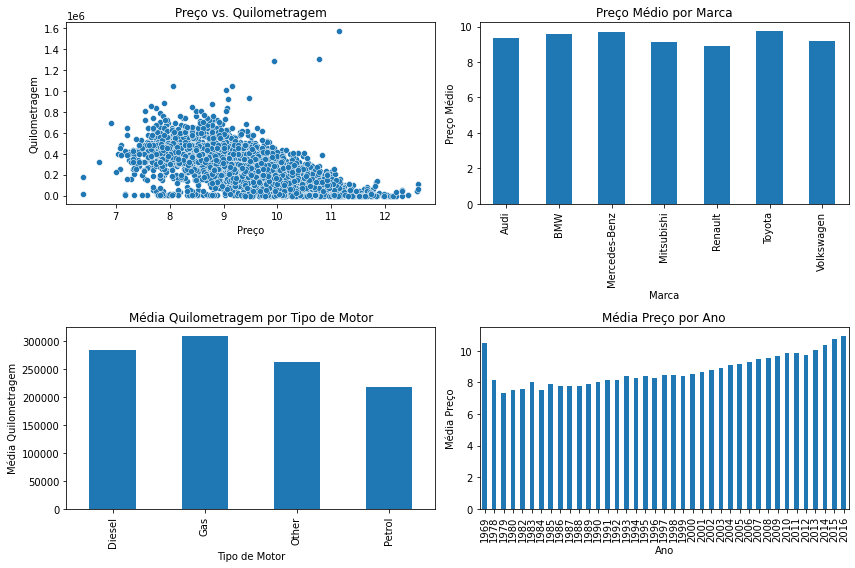

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico 1: Preço vs. Quilometragem
sns.scatterplot(x='log_preco', y='Quilometragem', data=df, ax=axs[0, 0])
axs[0, 0].set_xlabel('Preço')
axs[0, 0].set_ylabel('Quilometragem')
axs[0, 0].set_title('Preço vs. Quilometragem')

# Gráfico 2: Preço Médio por Marca
mean_price_by_brand = df.groupby('Marca')['log_preco'].mean()
mean_price_by_brand.plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_xlabel('Marca')
axs[0, 1].set_ylabel('Preço Médio')
axs[0, 1].set_title('Preço Médio por Marca')

# Gráfico 3: Média Quilometragem por Tipo de Motor
mean_quilometragem_by_motor = df.groupby('Tipo_de_motor')['Quilometragem'].mean()
mean_quilometragem_by_motor.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_xlabel('Tipo de Motor')
axs[1, 0].set_ylabel('Média Quilometragem')
axs[1, 0].set_title('Média Quilometragem por Tipo de Motor')

# Gráfico 4: Média Preço por Ano
mean_log_price_by_year = df.groupby('Ano')['log_preco'].mean()
mean_log_price_by_year.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_xlabel('Ano')
axs[1, 1].set_ylabel('Média Preço')
axs[1, 1].set_title('Média Preço por Ano')

plt.tight_layout()  # Ajusta o espaçamento entre os subplots
plt.show()


## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

**Resposta:** Com base no conjunto de dados fornecido, é indicada a aplicação do modelo de regressão de aprendizado de máquina para prever o preço de venda. A regressão permite estimar a relação entre o preço de venda do carro e as variáveis independentes, como ano, quilometragem e tipo de combustível. 

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

Resposta: A aplicação da técnica de Random Forest é mais adequada para prever o preço de venda de carros, pois ela permite capturar relações mais complexas e não lineares entre as variáveis independentes e a variável dependente. Embora a regressão linear múltipla seja uma técnica razoavelmente simples e fácil de interpretar, ela pode não ser capaz de lidar com a complexidade dos dados de carros usados, que podem ter diversas interações entre as variáveis.

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1: RandomForestRegressor

Algoritmo 2: LinearRegression

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Convertendo variáveis categóricas em variáveis binárias
df_dummies = pd.get_dummies(df, drop_first=True)

# Separando as variáveis independentes e dependentes
x = df_dummies.drop('log_preco', axis = 1)
y = df_dummies['log_preco']

# Dividindo os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=2, random_state=365)

7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo com os dados de treinamento x_train e y_train
rf_model.fit(x_train, y_train)
rf_r2_score = r2_score(y_test, rf_model.predict(x_test))
rf_rmse = mean_squared_error(y_test, rf_model.predict(x_test), squared=False)

print("Random Forest R2-score: {:.2f}".format(rf_r2_score))
print("Random Forest RMSE: {:.2f}".format(rf_rmse))

Random Forest R2-score: 0.98
Random Forest RMSE: 0.09


7.2 - Algoritmo 2:  (0,5)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Cria o objeto do modelo de regressão linear múltipla
lr_model = LinearRegression()

# Treina o modelo com os dados de treinamento x_train e y_train
lr_model.fit(x_train, y_train)

# Faz as previsões com o modelo treinado usando os dados de teste x_test
lr_y_pred = lr_model.predict(x_test)

# Calcula o R2-score e o RMSE do modelo de regressão linear múltipla
lr_r2_score = r2_score(y_test, lr_y_pred)
lr_rmse = mean_squared_error(y_test, lr_y_pred, squared=False)

print("Regressão Linear Múltipla R2-score: {:.2f}".format(lr_r2_score))
print("Regressão Linear Múltipla RMSE: {:.2f}".format(lr_rmse))

Regressão Linear Múltipla R2-score: 0.99
Regressão Linear Múltipla RMSE: 0.07


7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

Resposta: Embora a técnica de Regressão Linear Múltipla tenha apresentado um desempenho superior em relação à Random Forest, com um R2-score maior e um RMSE menor, é importante destacar que a Random Forest é capaz de lidar melhor com dados não lineares. 

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [17]:
# Criando uma função para adicionar um novo registro ao dataframe
def adicionar_registro(df, registro):
    df_atualizado = df.append(registro, ignore_index=True)
    return df_atualizado

# Definindo o novo registro a ser adicionado
novo_registro = {'Marca': 'Volkswagen',
                 'Carroceria': 'sedan',
                 'Quilometragem': 172095,
                 'Capacidade_do_motor': 2.0,
                 'Tipo_de_motor': 'Gas',
                 'Registro': 'yes',
                 'Ano': 2005,
                 'Modelo': 'Polo'}

# Adicionando o novo registro ao dataframe original
df_atualizado = adicionar_registro(df, novo_registro)

# Aplicando one-hot encoding para variáveis categóricas
df_atualizado_dummies = pd.get_dummies(df_atualizado, drop_first=True)

# Selecionando o último registro adicionado
ultimo_registro = df_atualizado_dummies.iloc[-1]

# Criando um novo dataframe somente com o último registro
ultimo_registro_df = pd.DataFrame([ultimo_registro.to_dict()])

# Removendo a coluna 'log_preco' do último registro (se existir)
ultimo_registro_df = ultimo_registro_df.drop('log_preco', axis=1)

<ipython-input-17-eba80cba2446>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_atualizado = df.append(registro, ignore_index=True)


In [18]:
# Obtendo o valor estimado do carro com a técnica Random Forest
previsao = rf_model.predict(ultimo_registro_df)
preco_estimado = np.e**previsao[0]

print("Valor estimado: US$ {:.2f}".format(preco_estimado))

Valor estimado: US$ 9129.36
